In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import normaltest, pearsonr

# читаем датасет
data = pd.read_csv("coffee_review.csv")

# смотрим первыве строки датасета
data.head()

,name,roaster,roast,loc_country,origin,100g_USD,rating,review_date,review
0,Ethiopia Shakiso Mormora,Revel Coffee,Medium-Light,United States,Ethiopia,4.70,92,November 2017,"Crisply sweet, cocoa-toned. Lemon blossom, roa..."
1,Ethiopia Suke Quto,Roast House,Medium-Light,United States,Ethiopia,4.19,92,November 2017,"Delicate, sweetly spice-toned. Pink peppercorn..."
2,Ethiopia Gedeb Halo Beriti,Big Creek Coffee Roasters,Medium,United States,Ethiopia,4.85,94,November 2017,"Deeply sweet, subtly pungent. Honey, pear, tan..."
3,Ethiopia Kayon Mountain,Red Rooster Coffee Roaster,Light,United States,Ethiopia,5.14,93,November 2017,"Delicate, richly and sweetly tart. Dried hibis..."
4,Ethiopia Gelgelu Natural Organic,Willoughby's Coffee & Tea,Medium-Light,United States,Ethiopia,3.97,93,November 2017,"High-toned, floral. Dried apricot, magnolia, a..."


In [50]:
# смотрим общую информацию о датасете
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1246 entries, 0 to 1245
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         1246 non-null   object 
 1   roaster      1246 non-null   object 
 2   roast        1234 non-null   object 
 3   loc_country  1246 non-null   object 
 4   origin       1246 non-null   object 
 5   100g_USD     1246 non-null   float64
 6   rating       1246 non-null   int64  
 7   review_date  1246 non-null   object 
 8   review       1246 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 87.7+ KB


Мы получили инормацию о типах данных датасета

In [51]:
# подсчет количества NaN значений
data.isnull().sum()

name            0
roaster         0
roast          12
loc_country     0
origin          0
100g_USD        0
rating          0
review_date     0
review          0
dtype: int64

в поле roast есть 12 NaN значений

In [52]:
# убираем строки с NaN
data.dropna()

,name,roaster,roast,loc_country,origin,100g_USD,rating,review_date,review
0,Ethiopia Shakiso Mormora,Revel Coffee,Medium-Light,United States,Ethiopia,4.70,92,November 2017,"Crisply sweet, cocoa-toned. Lemon blossom, roa..."
1,Ethiopia Suke Quto,Roast House,Medium-Light,United States,Ethiopia,4.19,92,November 2017,"Delicate, sweetly spice-toned. Pink peppercorn..."
2,Ethiopia Gedeb Halo Beriti,Big Creek Coffee Roasters,Medium,United States,Ethiopia,4.85,94,November 2017,"Deeply sweet, subtly pungent. Honey, pear, tan..."
3,Ethiopia Kayon Mountain,Red Rooster Coffee Roaster,Light,United States,Ethiopia,5.14,93,November 2017,"Delicate, richly and sweetly tart. Dried hibis..."
4,Ethiopia Gelgelu Natural Organic,Willoughby's Coffee & Tea,Medium-Light,United States,Ethiopia,3.97,93,November 2017,"High-toned, floral. Dried apricot, magnolia, a..."
...,...,...,...,...,...,...,...,...,...
1241,Finca Patzibir,El Gran Cafe,Medium-Light,Guatemala,Guatemala,4.70,92,November 2022,"Crisply sweet, nut-toned. Almond brittle, pie ..."
1242,Proyecto Aurora,El Gran Cafe,Medium-Light,Guatemala,Guatemala,2.94,93,November 2022,"Chocolaty, floral-framed. Cocoa nib, honeysuck..."
1243,Finca El Potrero,El Gran Cafe,Medium-Light,Guatemala,Guatemala,2.94,93,November 2022,"High-toned, enticingly sweet. Black cherry, na..."
1244,Chacayá Santiago Atitlán,El Gran Cafe,Medium-Light,Guatemala,Guatemala,4.70,93,November 2022,"Vibrantly sweet, subtly nuanced. Apricot, dar..."


In [53]:
# выберем уникальные значения ячеек
unique_names = data.select_dtypes(include="object").columns

for column in unique_names:
    print(f"{column}: {data[column].unique()}")

name: ['Ethiopia Shakiso Mormora' 'Ethiopia Suke Quto'
 'Ethiopia Gedeb Halo Beriti' ... 'Finca El Potrero'
 'Chacayá Santiago Atitlán' 'Espresso No. 3']
roaster: ['Revel Coffee' 'Roast House' 'Big Creek Coffee Roasters'
 'Red Rooster Coffee Roaster' "Willoughby's Coffee & Tea"
 'Black Oak Coffee Roasters' 'Wonderstate Coffee' 'Reunion Island Coffee'
 'Old Soul Co.' 'A.R.C.' 'Paradise Roasters' 'Hula Daddy Kona Coffee'
 'Kakalove Cafe' 'Jackrabbit Java' 'Propeller Coffee'
 'Chocolate Fish Coffee Roasters' 'Lexington Coffee Roasters'
 'Noble Coffee Roasting' "Ben's Beans" 'Espresso Republic'
 'Good Folks Coffee' 'Flight Coffee Co.' 'Green Stone Coffee'
 'Equator Coffees & Teas' 'Klatch Coffee' "Ka'u Specialty Coffee"
 'Simon Hsieh’s Aroma Roast Coffees' "PT's Coffee Roasting"
 'Hala Tree Kona Coffee' 'Barrington Coffee Roasting'
 'The WestBean Coffee Roasters' 'Mystic Monk Coffee' 'JBC Coffee Roasters'
 'Good Chance Biotechnology, Ltd.' 'Manzanita Roasting Company'
 'Bird Rock Coffee Ro

In [54]:
# преобразуем категориальные переменные в фиктивные
if not unique_names.empty:
    data = pd.get_dummies(data, columns=unique_names, drop_first=True)

In [55]:
# узнаем инфо о измененном датасете
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1246 entries, 0 to 1245
Columns: 2788 entries, 100g_USD to review_ Rich-toned, deeply sweet. Dark chocolate, date, singed cedar, Bing cherry, saltwater taffy. Deepy sweet structure with gentle acidity; viscous, smooth mouthfeel. The finish consolidates to dark chocolate and saltwater taffy.
dtypes: bool(2786), float64(1), int64(1)
memory usage: 3.3 MB


Построим гистаграмму для колонки с рейтингом

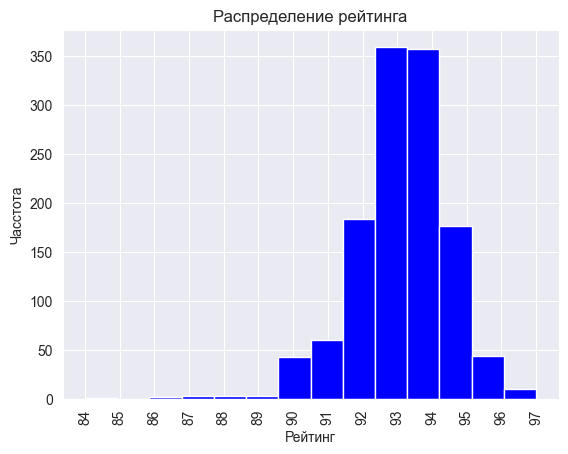

In [56]:
bin_num = data["rating"].max() - data["rating"].min() + 1

plt.hist(data['rating'], bins=bin_num, color='blue')
plt.title("Распределение рейтинга")
plt.xlabel("Рейтинг")
plt.ylabel("Часстота")

x_ticks = np.arange(data['rating'].min(), data['rating'].max() + 1)
plt.xticks(x_ticks, rotation=90)  # Повернем подпись по оси x

plt.show()

Построим точечную диаграмму для рейтинга и цены

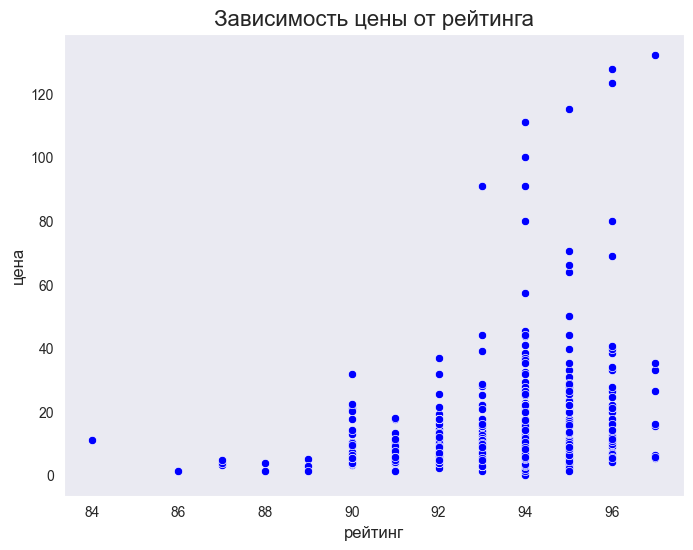

In [57]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data["rating"], y=data['100g_USD'], color="blue")
plt.title("Зависимость цены от рейтинга", fontsize=16)
plt.xlabel("рейтинг", fontsize=12)
plt.ylabel("цена", fontsize=12)
plt.grid()
plt.show()

поставим гипотезу: цена распределена нормально
Далее проверим ее

In [58]:
stat, p_value = normaltest(data['100g_USD'])
print(f"Статистика: {stat}, p-значеник: {p_value}")

if p_value < 0.05:
    print("гипотеза отвергается")
else:
    print("гипотеза подтверждается")

Статистика: 1306.4548276784508, p-значеник: 2.0273967300444e-284
гипотеза отвергается


проверим зависимость между рейтингом и ценой

In [59]:
corr, p_value_corr = pearsonr(data['100g_USD'], data['rating'])
print(f"Коэффициент корреляции: {corr}, p-value: {p_value_corr}")

if p_value_corr < 0.05:
    print("Корреляция значима.")
else:
    print("Корреляция незначима.")

Коэффициент корреляции: 0.2416154039156363, p-value: 5.213257231723688e-18
Корреляция значима.


Как мы видим корреляция подтвердилась